<a href="https://colab.research.google.com/github/yashvardhan751/Sem_End-Project/blob/main/Machine_Learning_for_Stock_Prediction_(New).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Stock Prediction**




For Historical Data We Used

Yahoo Finance website: [Yahoo Finance.](https://finance.yahoo.com/)


In [ ]:
# Step 1: Install required libraries
# Use This Code Only For the First time

#!pip install pandas numpy scikit-learn tensorflow matplotlib
#!pip install yfinance

In [ ]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Step 3: Load the dataset
# Assuming you have a CSV file 'historical_stock_data.csv' with columns 'Date' and 'Close'
# data = pd.read_csv('/content/abc.csv')
# data['Date'] = pd.to_datetime(data['Date'])
# data = data.set_index('Date')

# Step 3: Load the dataset from Yahoo Finance
# Replace 'AAPL' with the stock symbol you are interested in
stock_symbol = 'BHEL.NS'
data = yf.download(stock_symbol, start='2022-01-01', end='2023-11-23')  # Adjust the date range as needed

# Assuming the 'Date' column is not already the index, you can set it as the index
data = data.reset_index()

# Display the first few rows of the loaded data
print(data.head())

[*********************100%%**********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-01-03  59.000000  60.950001  58.750000  60.700001  60.073593  26998477
1 2022-01-04  60.950001  61.200001  59.299999  60.049999  59.430298  23684780
2 2022-01-05  59.549999  60.599998  59.500000  59.799999  59.182877  21100778
3 2022-01-06  59.150002  60.549999  58.549999  60.150002  59.529270  21274724
4 2022-01-07  61.000000  61.099998  58.900002  59.500000  58.885975  23860527


In [ ]:
# Step 4: Prepare the data (modified)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])
X, y = [], []

#plt.plot(data_scaled)

In [ ]:
# Creating a dataset with 60 timesteps and 1 output
for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


# Check for NaN values in the target variable
nan_indices = np.isnan(y)

# If there are NaN values, remove them
if np.any(nan_indices):
    print("Removing rows with NaN values in the target variable.")
    X = X[~nan_indices]
    y = y[~nan_indices]

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Step 6: Prediction and Evaluation for Linear Regression
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (Linear Regression): {mse_lr}")

Mean Squared Error (Linear Regression): 0.0005276069419004118


In [ ]:
# Step 7: LSTM Model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

# Extracting loss information from training history
loss_values = history_lstm.history['loss']

# Step 8: Prediction and Evaluation for LSTM
y_pred_lstm = model_lstm.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f"Mean Squared Error (LSTM): {mse_lstm}")

Epoch 1/50
11/11 [==============================] - 5s 52ms/step - loss: 0.0737
Epoch 2/50
11/11 [==============================] - 1s 52ms/step - loss: 0.0115
Epoch 3/50
11/11 [==============================] - 1s 52ms/step - loss: 0.0062
Epoch 4/50
11/11 [==============================] - 1s 53ms/step - loss: 0.0034
Epoch 5/50
11/11 [==============================] - 1s 51ms/step - loss: 0.0030
Epoch 6/50
11/11 [==============================] - 1s 51ms/step - loss: 0.0030
Epoch 7/50
11/11 [==============================] - 1s 50ms/step - loss: 0.0034
Epoch 8/50
11/11 [==============================] - 1s 56ms/step - loss: 0.0027
Epoch 9/50
11/11 [==============================] - 1s 84ms/step - loss: 0.0028
Epoch 10/50
11/11 [==============================] - 1s 82ms/step - loss: 0.0026
Epoch 11/50
11/11 [==============================] - 1s 86ms/step - loss: 0.0025
Epoch 12/50
11/11 [==============================] - 1s 82ms/step - loss: 0.0025
Epoch 13/50
11/11 [==================

In [ ]:
# Calculate Mean Squared Error (MSE) for LSTM
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f"Mean Squared Error (LSTM): {mse_lstm}")


# Calculate Mean Squared Error (MSE) for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"\nMean Squared Error (Linear Regression): {mse_lr}")

Mean Squared Error (LSTM): 0.0015109216062187095

Mean Squared Error (Linear Regression): 0.0005276069419004118


In [ ]:
# Calculate prediction accuracy in percentage for Linear Regression
accuracy_lr = 100 - np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
print(f"Prediction Accuracy (Linear Regression): {accuracy_lr:.2f}%")

# Calculate prediction accuracy in percentage for LSTM
accuracy_lstm = 100 - np.mean(np.abs((y_test - y_pred_lstm.flatten()) / y_test)) * 100
print(f"\nPrediction Accuracy (LSTM): {accuracy_lstm:.2f}%")


Prediction Accuracy (Linear Regression): 90.77%

Prediction Accuracy (LSTM): 84.83%


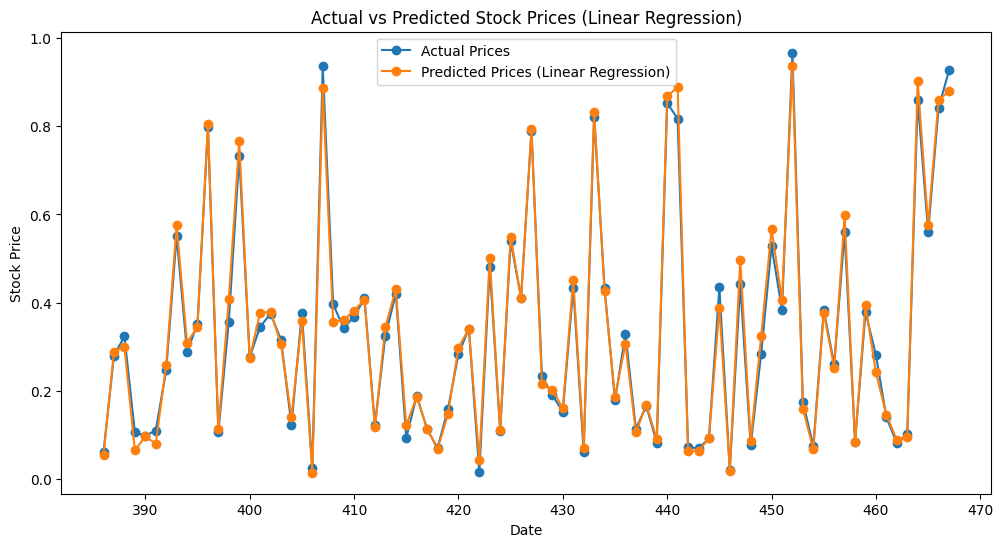

In [ ]:
# Step 9: Visualization
# Plot actual vs predicted prices for Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', marker='o')
plt.plot(data.index[-len(y_test):], y_pred_lr, label='Predicted Prices (Linear Regression)', marker='o')
plt.title('Actual vs Predicted Stock Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

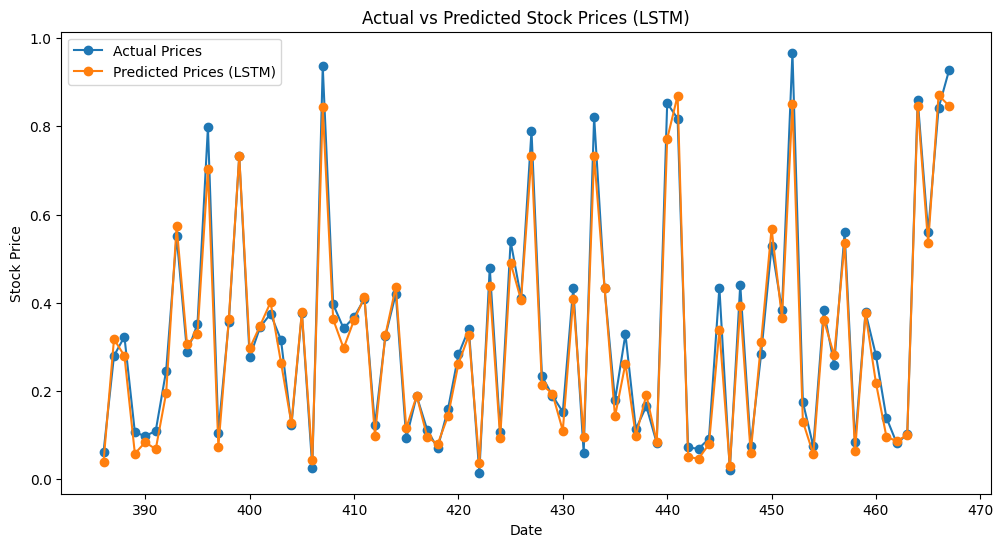

In [ ]:
# Plot actual vs predicted prices for LSTM
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', marker='o')
plt.plot(data.index[-len(y_test):], y_pred_lstm, label='Predicted Prices (LSTM)', marker='o')
plt.title('Actual vs Predicted Stock Prices (LSTM)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

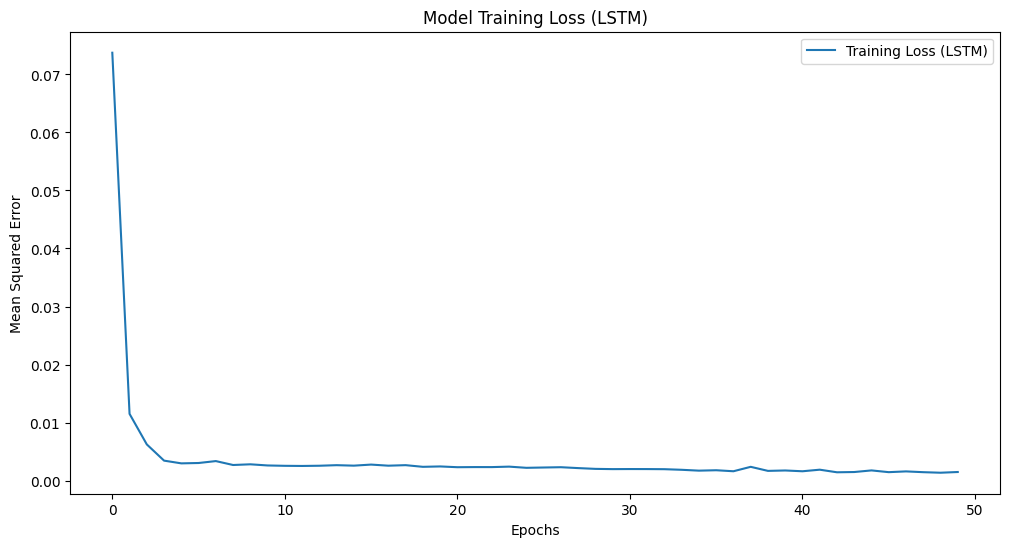

In [ ]:
# Step 10: Plot the model training loss for LSTM
plt.figure(figsize=(12, 6))
plt.plot(loss_values, label='Training Loss (LSTM)')
plt.title('Model Training Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()